Постройте график зависимости весов всех признаков от lambda в самописной L2-регуляризации (на данных про ЕГЭ). Сделайте вывод

Напишите функцию наподобие gradient_descent_reg_l2, но для применения L1-регуляризации.

*Можно ли к одному и тому же признаку применить сразу и нормализацию, и стандартизацию?

*Сгенерируйте датасет при помощи sklearn.datasets.make_regression и обучите линейную модель при помощи градиентного и стохастического градиентного спуска. Нанесите среднеквадратичную ошибку для обоих методов на один график, сделайте выводы о разнице скорости сходимости каждого из методов.

In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
X = np.array([[   1,    1,  500,    1],
              [   1,    1,  700,    1],
              [   1,    2,  750,    2],
              [   1,    5,  600,    1],
              [   1,    3, 1450,    2],
              [   1,    0,  800,    1],
              [   1,    5, 1500,    3],
              [   1,   10, 2000,    3],
              [   1,    1,  450,    1],
              [   1,    2, 1000,    2]])

y = [45, 55, 50, 55, 60, 35, 75, 80, 50, 60]

Постройте график зависимости весов всех признаков от lambda в самописной L2-регуляризации (на данных про ЕГЭ). Сделайте вывод

In [18]:
X[:, 1].min(), X[:, 1].max()

(0, 10)

In [19]:
X[:, 2].min(), X[:, 2].max()

(450, 2000)

In [20]:
def min_max_scale(X):
    return (X - X.min()) / (X.max() - X.min())

In [21]:
X_norm = X.copy()
X_norm = X_norm.astype(np.float64)
X_norm

array([[1.00e+00, 1.00e+00, 5.00e+02, 1.00e+00],
       [1.00e+00, 1.00e+00, 7.00e+02, 1.00e+00],
       [1.00e+00, 2.00e+00, 7.50e+02, 2.00e+00],
       [1.00e+00, 5.00e+00, 6.00e+02, 1.00e+00],
       [1.00e+00, 3.00e+00, 1.45e+03, 2.00e+00],
       [1.00e+00, 0.00e+00, 8.00e+02, 1.00e+00],
       [1.00e+00, 5.00e+00, 1.50e+03, 3.00e+00],
       [1.00e+00, 1.00e+01, 2.00e+03, 3.00e+00],
       [1.00e+00, 1.00e+00, 4.50e+02, 1.00e+00],
       [1.00e+00, 2.00e+00, 1.00e+03, 2.00e+00]])

In [22]:
X_norm[:, 1] = min_max_scale(X_norm[:, 1])
X_norm[:, 2] = min_max_scale(X_norm[:, 2])
X_norm[:, 3] = min_max_scale(X_norm[:, 3])
X_norm

array([[1.        , 0.1       , 0.03225806, 0.        ],
       [1.        , 0.1       , 0.16129032, 0.        ],
       [1.        , 0.2       , 0.19354839, 0.5       ],
       [1.        , 0.5       , 0.09677419, 0.        ],
       [1.        , 0.3       , 0.64516129, 0.5       ],
       [1.        , 0.        , 0.22580645, 0.        ],
       [1.        , 0.5       , 0.67741935, 1.        ],
       [1.        , 1.        , 1.        , 1.        ],
       [1.        , 0.1       , 0.        , 0.        ],
       [1.        , 0.2       , 0.35483871, 0.5       ]])

In [25]:
def standard_scale(X):
    mean = X.mean()
    std = X.std()
    return (X - mean) / std

In [26]:
X_st = X.copy().astype(np.float64)
X_st[:, 1] = standard_scale(X_st[:, 1])
X_st[:, 2] = standard_scale(X_st[:, 2])
X_st[:, 3] = standard_scale(X_st[:, 3])

X_st

array([[ 1.        , -0.70710678, -0.97958969, -0.89625816],
       [ 1.        , -0.70710678, -0.56713087, -0.89625816],
       [ 1.        , -0.35355339, -0.46401617,  0.38411064],
       [ 1.        ,  0.70710678, -0.77336028, -0.89625816],
       [ 1.        ,  0.        ,  0.97958969,  0.38411064],
       [ 1.        , -1.06066017, -0.36090146, -0.89625816],
       [ 1.        ,  0.70710678,  1.08270439,  1.66447944],
       [ 1.        ,  2.47487373,  2.11385144,  1.66447944],
       [ 1.        , -0.70710678, -1.08270439, -0.89625816],
       [ 1.        , -0.35355339,  0.05155735,  0.38411064]])

In [27]:
def calc_mse(y, y_pred):
    err = np.mean((y - y_pred)**2)
    return err

In [57]:
def gradient_descent_reg_l2(X, y, iterations, eta=1e-4, reg=1e-8):
    W = np.random.randn(X.shape[1])
    n = X.shape[0]
    
    for i in range(0, iterations):
        y_pred = np.dot(X, W)
        err = calc_mse(y, y_pred)
        
        dQ = 2/n * X.T @ (y_pred - y) # градиент функции ошибки
        dReg = reg * W # градиент регуляризации
        
        W -= eta * (dQ + dReg)
    return W

In [58]:
gradient_descent_reg_l2(X_norm, y, iterations=5000, eta=1e-2, reg=1e-4)

array([44.1832201 , 20.57161116,  3.05539527, 14.59208732])

In [59]:
from tqdm import tqdm

10it [00:01,  8.82it/s]


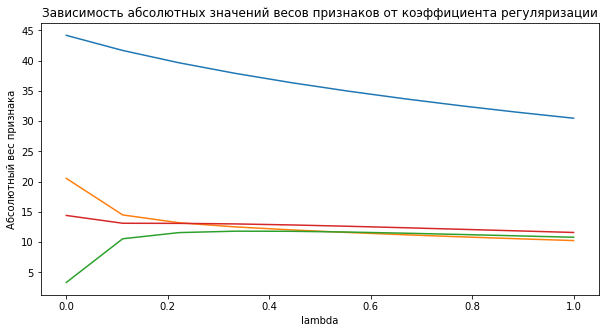

In [60]:
n = X.shape[0]
coeffs = np.zeros((n, X_norm.shape[1]))
lambda_list = np.linspace(0, 1, 10)

for i, val in tqdm(enumerate(lambda_list)):
    weights = gradient_descent_reg_l2(X_norm, y, iterations=5000, eta=1e-2, reg=val)
    coeffs[i, :] = weights

plt.figure(figsize=(10, 5))
for i in range(X_norm.shape[1]):
    plt.plot(lambda_list, coeffs[:, i])
    
plt.title('Зависимость абсолютных значений весов признаков от коэффициента регуляризации')
plt.xlabel('lambda')
plt.ylabel('Абсолютный вес признака');

2. Напишите функцию наподобие gradient_descent_reg_l2, но для применения L1-регуляризации.

In [49]:
def gradient_descent_L1(X, y, iterations, eta=1e-4, reg=1e-8):
    W = np.random.randn(X.shape[1])
    n = X.shape[0]
    
    for i in range(0, iterations):
        y_pred = np.dot(X, W)
        err = calc_mse(y, y_pred)
        
        dQ = 2/n * X.T @ (y_pred - y) # градиент функции ошибки
        dReg = reg * np.sign(W) # градиент регуляризации
        
        W -= eta * dQ + dReg
        
        if i % (iterations / 10) == 0:
            print(f'Iter: {i}, weights: {W}, error {err}')
    
    print(f'Final MSE: {calc_mse(y, np.dot(X, W))}')
    return W

In [51]:
gradient_descent_L1(X_norm, y, iterations=10000, eta=1e-2, reg=1e-10)

Iter: 0, weights: [ 1.35682617  0.17319472  0.16020649 -0.33654634], error 3389.400038366465
Iter: 1000, weights: [44.10608522 15.27755234 10.08156208 12.52654531], error 27.38484392716834
Iter: 2000, weights: [44.1415857  17.45884808  7.73244815 12.86326318], error 26.332279593986236
Iter: 3000, weights: [44.14199583 18.88699969  5.91345126 13.39572432], error 25.764231331856287
Iter: 4000, weights: [44.15653315 19.83171726  4.47128576 13.93874933], error 25.4352494310565
Iter: 5000, weights: [44.17665318 20.47453138  3.32593979 14.43830698], error 25.236600678419055
Iter: 6000, weights: [44.19753527 20.92432786  2.41549399 14.87427649], error 25.113785083817575
Iter: 7000, weights: [44.21692571 21.24731005  1.69130476 15.24316088], error 25.03688373075533
Iter: 8000, weights: [44.23393666 21.48455927  1.1150023  15.54927857], error 24.988411058961532
Iter: 9000, weights: [44.24837599 21.66218691  0.6562355  15.80010136], error 24.95775296549828
Final MSE: 24.938328334600264


array([44.26037211, 21.79712253,  0.29127265, 16.00368663])

3. *Можно ли к одному и тому же признаку применить сразу и нормализацию, и стандартизацию?



бессмысленно, тк последнее перекроет предыдущее

4. *Сгенерируйте датасет при помощи sklearn.datasets.make_regression и обучите линейную модель при помощи градиентного и стохастического градиентного спуска. Нанесите среднеквадратичную ошибку для обоих методов на один график, сделайте выводы о разнице скорости сходимости каждого из методов.